<a href="https://colab.research.google.com/github/shahariartaki/ml_test/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import dates as mpl_dates

plt.style.use('fivethirtyeight')

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:


# Importing the training set
dataset_train = pd.read_csv('/My Drive/Colab Notebooks/test_greendelta.csv')
date = pd.read_csv('/My Drive/Colab Notebooks/train_greendelta.csv')

date['DATE'] = pd.to_datetime(date['DATE'])
date.sort_values('DATE', inplace=True)
price_date = date['DATE']
price_open = date['OPENP']
price_high = date['HIGH']
price_low = date['LOW']
price_close = date['CLOSEP']
price_volume = date['VOLUME']

NameError: ignored

In [0]:
training_set = dataset_train.iloc[:, 1:2].values
training_set_opening = dataset_train.iloc[:, 1:2].values
training_set_high = dataset_train.iloc[:, 2:3].values
training_set_low = dataset_train.iloc[:, 3:4].values
training_set_close = dataset_train.iloc[:, 4:5].values
training_set_volume = dataset_train.iloc[:, 5:6].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

training_set_scaled_opening = sc.fit_transform(training_set_opening)
training_set_scaled_high = sc.fit_transform(training_set_high)
training_set_scaled_low = sc.fit_transform(training_set_low)
training_set_scaled_close = sc.fit_transform(training_set_close)
#training_set_scaled_volume = sc.fit_transform(training_set_volume)

In [0]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(1,693):
    X_train.append(training_set_scaled[i-1:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)





In [0]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:

# X_train_opening = np.reshape(X_train_opening, (X_train_opening.shape[0], X_train_opening.shape[1], 1))
# X_train_high = np.reshape(X_train_high, (X_train_high.shape[0], X_train_high.shape[1], 1))
# X_train_low = np.reshape(X_train_low, (X_train_low.shape[0], X_train_low.shape[1], 1))
# X_train_close = np.reshape(X_train_close, (X_train_close.shape[0], X_train_close.shape[1], 1))
# X_train_volume = np.reshape(X_train_volume, (X_train_volume.shape[0], X_train_volume.shape[1], 1))
from sklearn.linear_model import LinearRegression as lm

In [0]:
X_train_opening = []
y_train_opening = []
for i in range(1,693):
    X_train_opening.append(training_set_scaled_opening[i-1:i, 0])
    y_train_opening.append(training_set_scaled_opening[i, 0])
X_train_opening, y_train_opening = np.array(X_train_opening), np.array(y_train_opening)
X_train_opening = np.reshape(X_train_opening, (X_train_opening.shape[0], X_train_opening.shape[1], 1))

In [0]:
X_train_high = []
y_train_high = []
for i in range(1,693):
    X_train_high.append(training_set_scaled_high[i-1:i, 0])
    y_train_high.append(training_set_scaled_high[i, 0])
X_train_high, y_train_high = np.array(X_train_high), np.array(y_train_high)

X_train_high = np.reshape(X_train_high, (X_train_high.shape[0], X_train_high.shape[1], 1))

In [0]:
X_train_low = []
y_train_low = []
for i in range(1,693):
    X_train_low.append(training_set_scaled_low[i-1:i, 0])
    y_train_low.append(training_set_scaled_low[i, 0])
X_train_low, y_train_low = np.array(X_train_low), np.array(y_train_low)
X_train_low = np.reshape(X_train_low, (X_train_low.shape[0], X_train_low.shape[1], 1))

In [0]:
X_train_close= []
y_train_close = []
for i in range(1,693):
    X_train_close.append(training_set_scaled_close[i-1:i, 0])
    y_train_close.append(training_set_scaled_close[i, 0])
X_train_close, y_train_close = np.array(X_train_close), np.array(y_train_close)
X_train_close = np.reshape(X_train_close, (X_train_close.shape[0], X_train_close.shape[1], 1))

In [0]:

X_train_volume = []
y_train_volume = []
for i in range(1,693):
    X_train_volume.append(training_set_scaled_volume[i-1:i, 0])
    y_train_volume.append(training_set_scaled_volume[i, 0])
X_train_volume, y_train_volume = np.array(X_train_volume), np.array(y_train_volume)
X_train_volume = np.reshape(X_train_volume, (X_train_volume.shape[0], X_train_volume.shape[1], 1))

In [0]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [0]:
regressor_opening = Sequential()

regressor_opening.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_opening.shape[1], 1)))
regressor_opening.add(Dropout(0.2))

regressor_opening.add(LSTM(units = 50, return_sequences = True))
regressor_opening.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation

regressor_opening.add(LSTM(units = 50))
regressor_opening.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))
regressor_opening.add(Dense(units = 1))

In [0]:
regressor_high = Sequential()

regressor_high.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_high.shape[1], 1)))
regressor_high.add(Dropout(0.2))

regressor_high.add(LSTM(units = 50, return_sequences = True))
regressor_high.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation


regressor_high.add(LSTM(units = 50))
regressor_high.add(Dropout(0.2))
# Adding the output layer

regressor_high.add(Dense(units = 1))




In [0]:
regressor_low = Sequential()

regressor_low.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_low.shape[1], 1)))
regressor_low.add(Dropout(0.2))

regressor_low.add(LSTM(units = 50, return_sequences = True))
regressor_low.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
regressor_low.add(LSTM(units = 50))
regressor_low.add(Dropout(0.2))
# Adding the output layer
regressor_low.add(Dense(units = 1))





In [0]:
regressor_close = Sequential()

regressor_close.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_close.shape[1], 1)))
regressor_close.add(Dropout(0.2))

regressor_close.add(LSTM(units = 50, return_sequences = True))
regressor_close.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation

regressor_close.add(LSTM(units = 50))
regressor_close.add(Dropout(0.2))

# Adding the output layer
regressor_close.add(Dense(units = 1))


In [0]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
692/692 [==============================] - 2s 2ms/step - loss: 0.2400
Epoch 2/100
692/692 [==============================] - 0s 194us/step - loss: 0.1031
Epoch 3/100
692/692 [==============================] - 0s 182us/step - loss: 0.0459
Epoch 4/100
692/692 [==============================] - 0s 178us/step - loss: 0.0340
Epoch 5/100
692/692 [==============================] - 0s 181us/step - loss: 0.0229
Epoch 6/100
692/692 [==============================] - 0s 178us/step - loss: 0.0140
Epoch 7/100
692/692 [==============================] - 0s 178us/step - loss: 0.0094
Epoch 8/100
692/692 [==============================] - 0s 176us/step - loss: 0.0102
Epoch 9/100
692/692 [==============================] - 0s 192us/step - loss: 0.0091
Epoch 10/100
692/692 [==============================] - 0s 199us/step - loss: 0.0088
Epoch 11/100
692/692 [==============================] - 0s 182us/step - loss: 0.0083
Epoch 12/100
692/692 [==============================] - 0s 182us/step - loss

In [0]:
# Compiling the RNN
regressor_opening.compile(optimizer = 'adam', loss = 'mean_squared_error')


# Fitting the RNN to the Training set

regressor_opening.fit( X_train_opening, y_train_opening, epochs = 100, batch_size = 32)



Epoch 1/100
692/692 [==============================] - 1s 2ms/step - loss: 0.2441
Epoch 2/100
692/692 [==============================] - 0s 129us/step - loss: 0.1108
Epoch 3/100
692/692 [==============================] - 0s 133us/step - loss: 0.0340
Epoch 4/100
692/692 [==============================] - 0s 128us/step - loss: 0.0274
Epoch 5/100
692/692 [==============================] - 0s 129us/step - loss: 0.0209
Epoch 6/100
692/692 [==============================] - 0s 141us/step - loss: 0.0138
Epoch 7/100
692/692 [==============================] - 0s 134us/step - loss: 0.0113
Epoch 8/100
692/692 [==============================] - 0s 136us/step - loss: 0.0089
Epoch 9/100
692/692 [==============================] - 0s 137us/step - loss: 0.0079
Epoch 10/100
692/692 [==============================] - 0s 131us/step - loss: 0.0083
Epoch 11/100
692/692 [==============================] - 0s 130us/step - loss: 0.0072
Epoch 12/100
692/692 [==============================] - 0s 144us/step - loss

In [0]:
# Compiling the RNN

regressor_high.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set


regressor_high.fit(X_train_high, y_train_high, epochs = 100, batch_size = 32)


Epoch 1/100
692/692 [==============================] - 1s 2ms/step - loss: 0.2310
Epoch 2/100
692/692 [==============================] - 0s 139us/step - loss: 0.1051
Epoch 3/100
692/692 [==============================] - 0s 129us/step - loss: 0.0435
Epoch 4/100
692/692 [==============================] - 0s 129us/step - loss: 0.0299
Epoch 5/100
692/692 [==============================] - 0s 127us/step - loss: 0.0186
Epoch 6/100
692/692 [==============================] - 0s 133us/step - loss: 0.0117
Epoch 7/100
692/692 [==============================] - 0s 133us/step - loss: 0.0079
Epoch 8/100
692/692 [==============================] - 0s 130us/step - loss: 0.0084
Epoch 9/100
692/692 [==============================] - 0s 125us/step - loss: 0.0079
Epoch 10/100
692/692 [==============================] - 0s 129us/step - loss: 0.0079
Epoch 11/100
692/692 [==============================] - 0s 145us/step - loss: 0.0072
Epoch 12/100
692/692 [==============================] - 0s 128us/step - loss

In [0]:
# Compiling the RNN
regressor_low.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set


regressor_low.fit( X_train_low, y_train_low, epochs = 100, batch_size = 32)


Epoch 1/100
692/692 [==============================] - 1s 2ms/step - loss: 0.2839
Epoch 2/100
692/692 [==============================] - 0s 126us/step - loss: 0.1486
Epoch 3/100
692/692 [==============================] - 0s 131us/step - loss: 0.0385
Epoch 4/100
692/692 [==============================] - 0s 137us/step - loss: 0.0285
Epoch 5/100
692/692 [==============================] - 0s 130us/step - loss: 0.0230
Epoch 6/100
692/692 [==============================] - 0s 141us/step - loss: 0.0155
Epoch 7/100
692/692 [==============================] - 0s 132us/step - loss: 0.0110
Epoch 8/100
692/692 [==============================] - 0s 134us/step - loss: 0.0099
Epoch 9/100
692/692 [==============================] - 0s 131us/step - loss: 0.0086
Epoch 10/100
692/692 [==============================] - 0s 138us/step - loss: 0.0081
Epoch 11/100
692/692 [==============================] - 0s 131us/step - loss: 0.0078
Epoch 12/100
692/692 [==============================] - 0s 137us/step - loss

In [0]:
# Compiling the RNN
regressor_close.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor_close.fit(X_train_close, y_train_close, epochs = 100, batch_size = 32)


Epoch 1/100
692/692 [==============================] - 1s 2ms/step - loss: 0.2324
Epoch 2/100
692/692 [==============================] - 0s 141us/step - loss: 0.1191
Epoch 3/100
692/692 [==============================] - 0s 132us/step - loss: 0.0461
Epoch 4/100
692/692 [==============================] - 0s 141us/step - loss: 0.0334
Epoch 5/100
692/692 [==============================] - 0s 131us/step - loss: 0.0207
Epoch 6/100
692/692 [==============================] - 0s 137us/step - loss: 0.0135
Epoch 7/100
692/692 [==============================] - 0s 136us/step - loss: 0.0079
Epoch 8/100
692/692 [==============================] - 0s 138us/step - loss: 0.0080
Epoch 9/100
692/692 [==============================] - 0s 130us/step - loss: 0.0078
Epoch 10/100
692/692 [==============================] - 0s 134us/step - loss: 0.0071
Epoch 11/100
692/692 [==============================] - 0s 133us/step - loss: 0.0068
Epoch 12/100
692/692 [==============================] - 0s 137us/step - loss

In [0]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price
dataset_test = pd.read_csv('test_greendelta.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price_opening = dataset_test.iloc[:, 1:2].values
real_stock_price_high = dataset_test.iloc[:, 2:3].values
real_stock_price_low = dataset_test.iloc[:, 3:4].values
real_stock_price_close = dataset_test.iloc[:, 4:5].values


date = pd.read_csv('test_greendelta.csv')

date['DATE'] = pd.to_datetime(date['DATE'])
date.sort_values('DATE', inplace=True)
price_date = date['DATE']



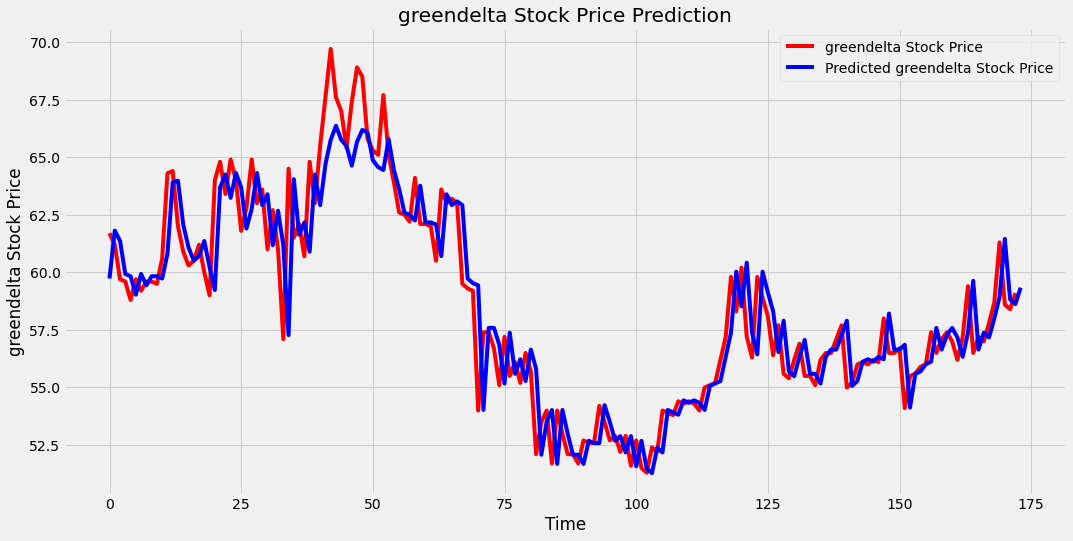

In [0]:
# Getting the predicted stock price 
dataset_total = pd.concat((dataset_train['OPENP'], dataset_test['OPENP']), axis = 0)
dataset_total_opening = pd.concat((dataset_train['OPENP'], dataset_test['OPENP']), axis = 0)
dataset_total_high = pd.concat((dataset_train['HIGH'], dataset_test['HIGH']), axis = 0)
dataset_total_low = pd.concat((dataset_train['LOW'], dataset_test['LOW']), axis = 0)
dataset_total_close = pd.concat((dataset_train['CLOSEP'], dataset_test['CLOSEP']), axis = 0)
dataset_total_volume = pd.concat((dataset_train['VOLUME'], dataset_test['VOLUME']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 1:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(1, 175):
    X_test.append(inputs[i-1:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# Visualising the results
plt.figure(figsize=(16,8))
plt.plot(real_stock_price, color = 'red', label = 'greendelta Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted greendelta Stock Price')
plt.title('greendelta Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('greendelta Stock Price')
plt.legend()
plt.show()

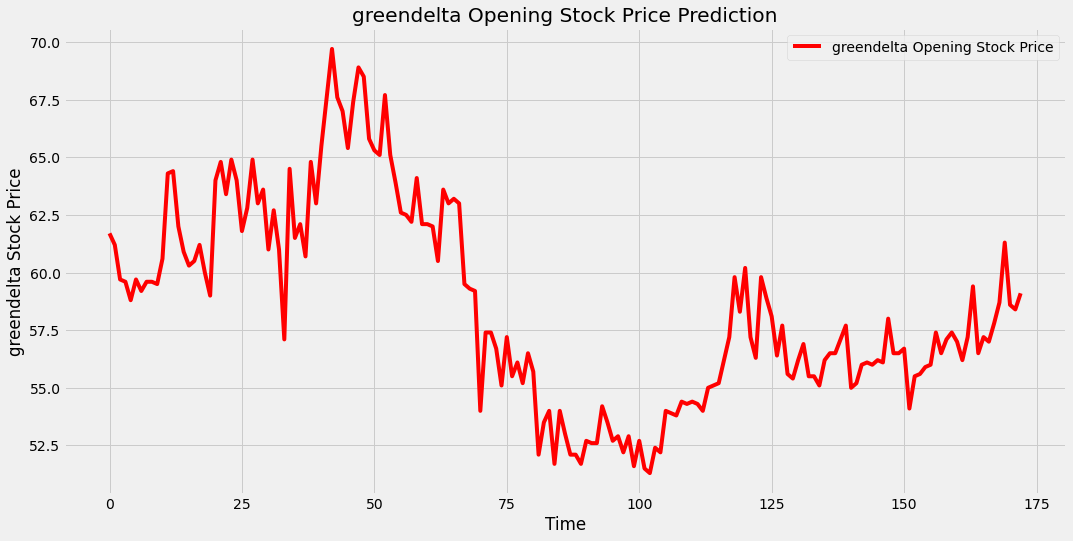

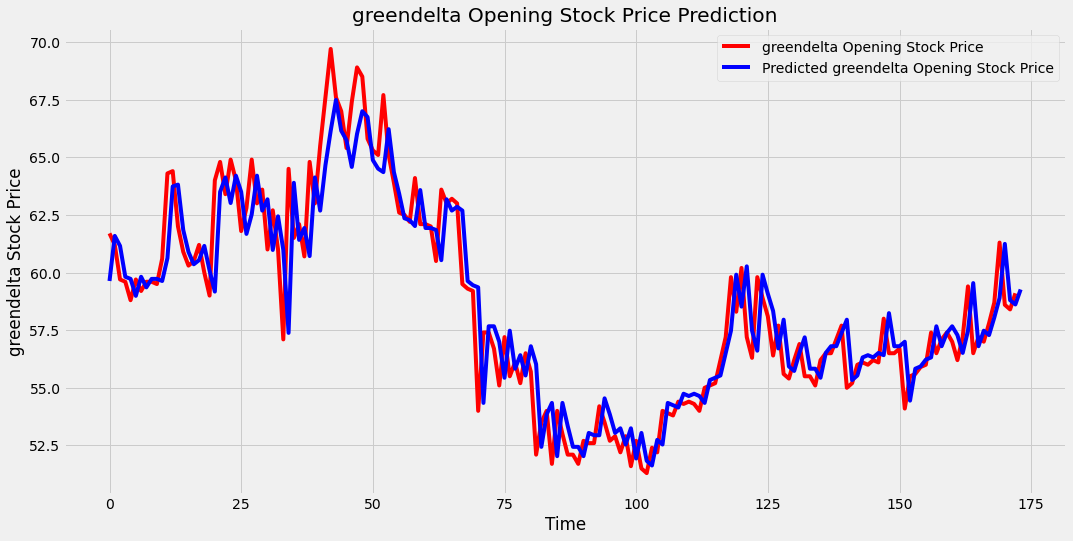

In [0]:
# Getting the predicted stock price 
inputs_opening  = dataset_total_opening[len(dataset_total_opening) - len(dataset_test) - 1:].values
inputs_opening  = inputs_opening.reshape(-1,1)
inputs_opening  = sc.transform(inputs_opening)
X_test_opening = []
for i in range(1, 175):
    X_test_opening.append(inputs_opening[i-1:i, 0])
X_test_opening = np.array(X_test_opening)
X_test_opening = np.reshape(X_test_opening, (X_test_opening.shape[0], X_test_opening.shape[1], 1))
predicted_stock_price_opening = regressor_opening.predict(X_test_opening)
predicted_stock_price_opening = sc.inverse_transform(predicted_stock_price_opening)

# Visualising the results
plt.figure(figsize=(16,8))
plt.plot(real_stock_price_opening, color = 'red', label = 'greendelta Opening Price Test Data')
#plt.plot(predicted_stock_price_opening, color = 'blue', label = 'Predicted greendelta Opening Stock Price')
plt.title('greendelta Opening Test Data')
plt.xlabel('Time')
plt.ylabel('greendelta Stock Price')
plt.legend()
plt.show()

# Visualising the results
plt.figure(figsize=(16,8))
plt.plot(real_stock_price_opening, color = 'red', label = 'greendelta Opening Stock Price')
plt.plot(predicted_stock_price_opening, color = 'blue', label = 'Predicted greendelta Opening Stock Price')
plt.title('greendelta Opening Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('greendelta Stock Price')
plt.legend()
plt.show()

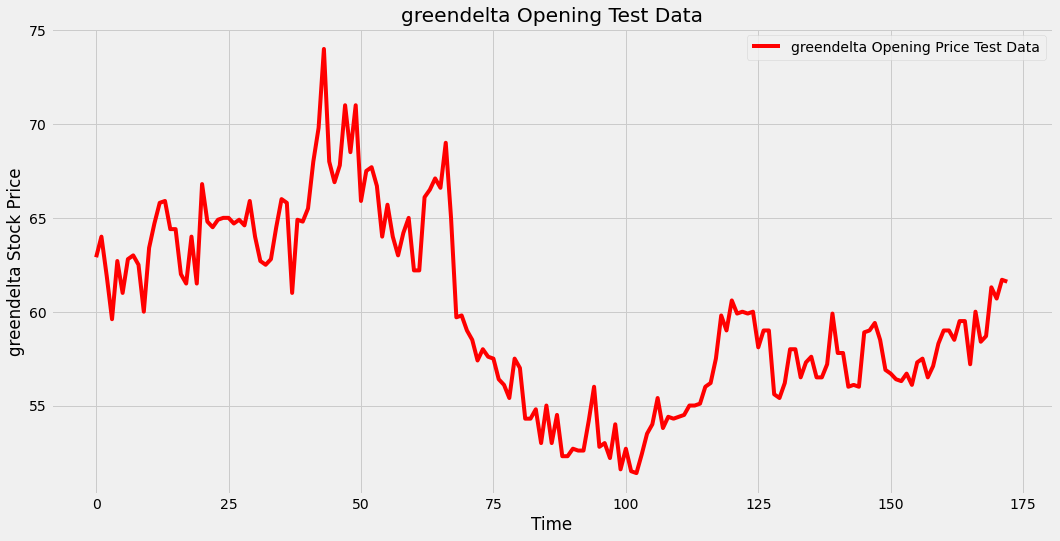

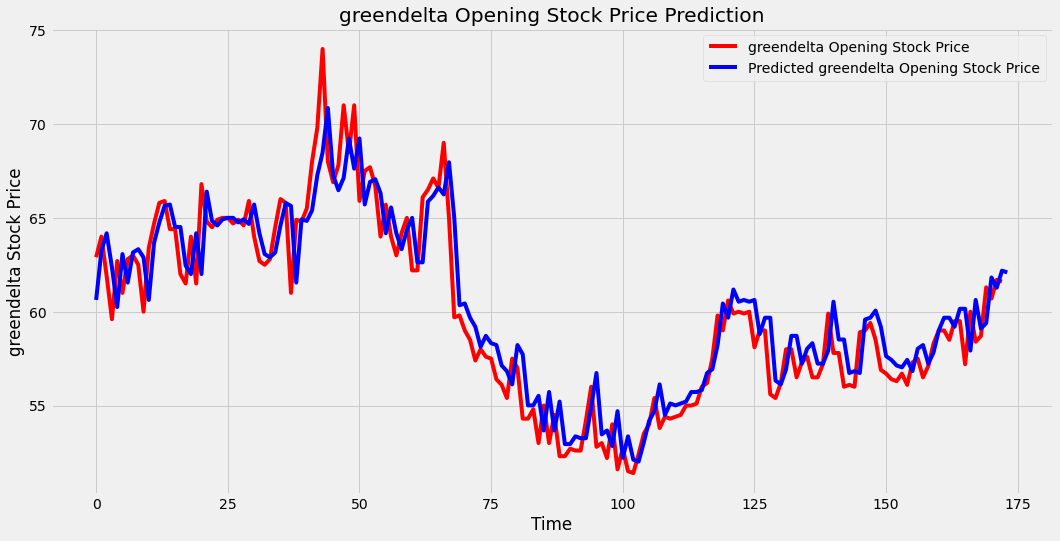

In [0]:
inputs_high = dataset_total_high[len(dataset_total_high) - len(dataset_test) - 1:].values
inputs_high = inputs_high.reshape(-1,1)
inputs_high = sc.transform(inputs_high)
X_test_high = []
for i in range(1, 175):
    X_test_high.append(inputs_high[i-1:i, 0])
X_test_high = np.array(X_test_high)
X_test_high = np.reshape(X_test_high, (X_test_high.shape[0], X_test_high.shape[1], 1))
predicted_stock_price_high = regressor_high.predict(X_test_high)
predicted_stock_price_high = sc.inverse_transform(predicted_stock_price_high)

# Visualising the results
plt.figure(figsize=(16,8))
plt.plot(real_stock_price_high, color = 'red', label = 'greendelta Opening Price Test Data')
#plt.plot(predicted_stock_price_opening, color = 'blue', label = 'Predicted greendelta Opening Stock Price')
plt.title('greendelta Opening Test Data')
plt.xlabel('Time')
plt.ylabel('greendelta Stock Price')
plt.legend()
plt.show()

# Visualising the results
plt.figure(figsize=(16,8))
plt.plot(real_stock_price_high, color = 'red', label = 'greendelta Opening Stock Price')
plt.plot(predicted_stock_price_high, color = 'blue', label = 'Predicted greendelta Opening Stock Price')
plt.title('greendelta Opening Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('greendelta Stock Price')
plt.legend()
plt.show()

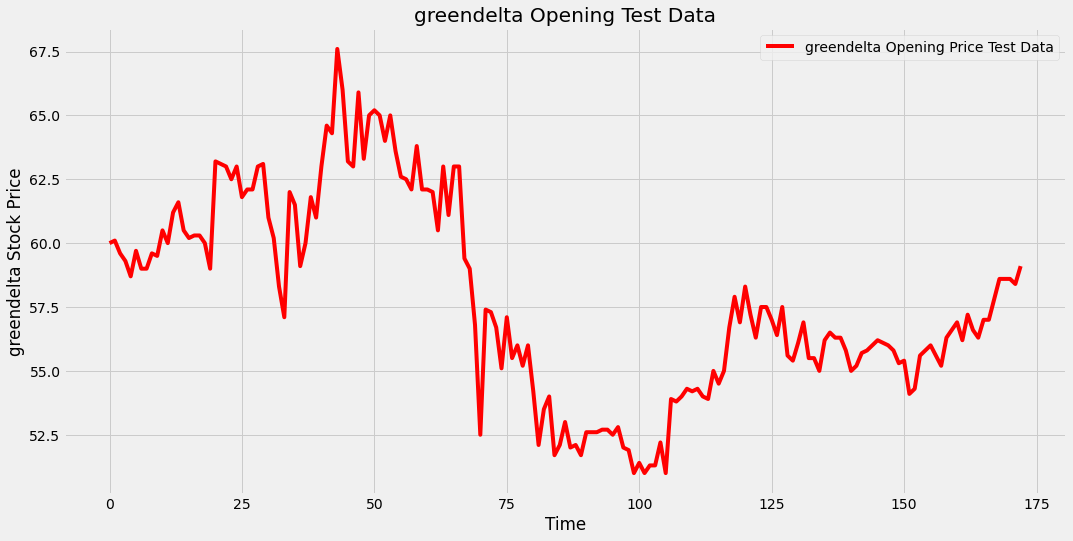

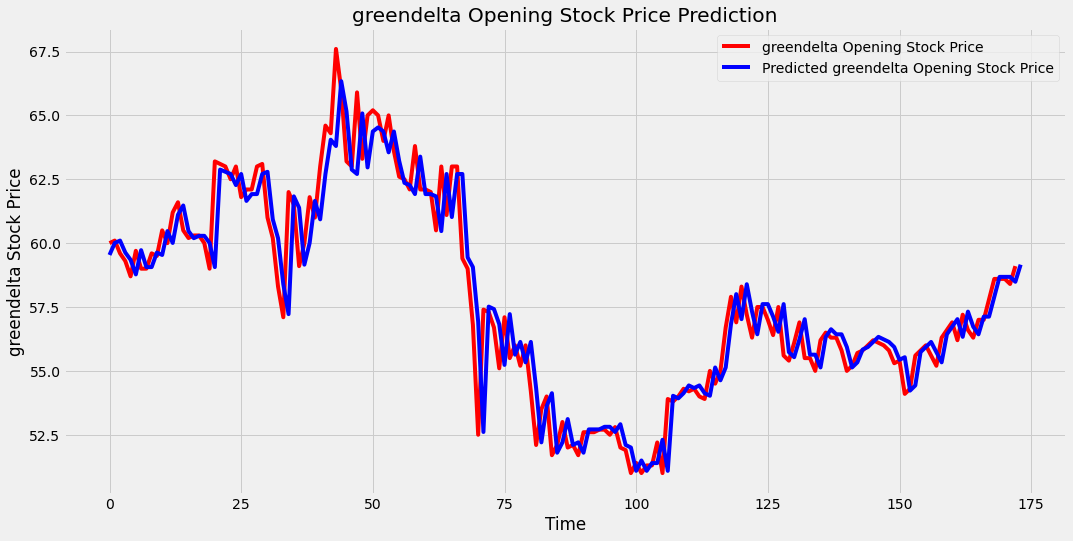

In [0]:
inputs_low = dataset_total_low[len(dataset_total_low) - len(dataset_test) - 1:].values
inputs_low = inputs_low.reshape(-1,1)
inputs_low = sc.transform(inputs_low)

X_test_low = []
for i in range(1, 175):
    X_test_low.append(inputs_low[i-1:i, 0])
X_test_low = np.array(X_test_low)
X_test_low = np.reshape(X_test_low, (X_test_low.shape[0], X_test_low.shape[1], 1))

predicted_stock_price_low = regressor_low.predict(X_test_low)
predicted_stock_price_low = sc.inverse_transform(predicted_stock_price_low)

# Visualising the results
plt.figure(figsize=(16,8))
plt.plot(real_stock_price_low, color = 'red', label = 'greendelta Opening Price Test Data')
#plt.plot(predicted_stock_price_opening, color = 'blue', label = 'Predicted greendelta Opening Stock Price')
plt.title('greendelta Opening Test Data')
plt.xlabel('Time')
plt.ylabel('greendelta Stock Price')
plt.legend()
plt.show()

# Visualising the results
plt.figure(figsize=(16,8))
plt.plot(real_stock_price_low, color = 'red', label = 'greendelta Opening Stock Price')
plt.plot(predicted_stock_price_low, color = 'blue', label = 'Predicted greendelta Opening Stock Price')
plt.title('greendelta Opening Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('greendelta Stock Price')
plt.legend()
plt.show()


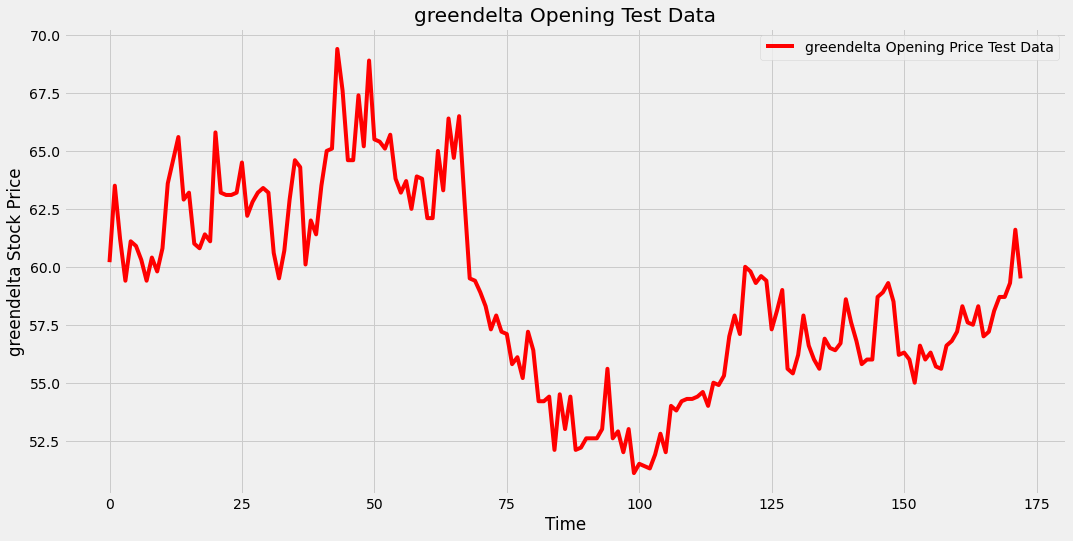

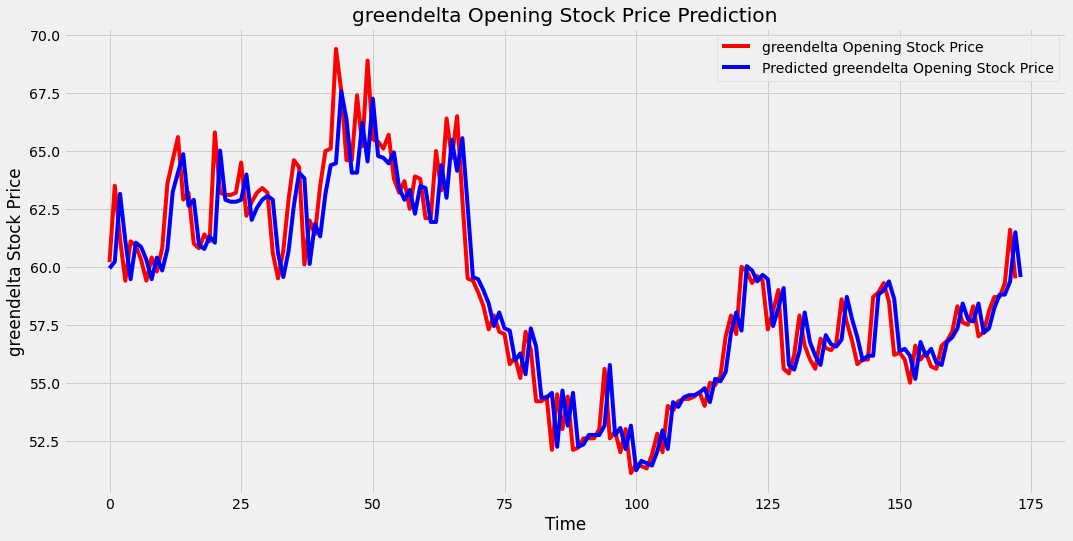

In [0]:
inputs_close = dataset_total_close[len(dataset_total_close) - len(dataset_test) - 1:].values
inputs_close = inputs_close.reshape(-1,1)
inputs_close = sc.transform(inputs_close)
X_test_close = []
for i in range(1, 175):
    X_test_close.append(inputs_close[i-1:i, 0])
X_test_close = np.array(X_test_close)
X_test_close = np.reshape(X_test_close, (X_test_close.shape[0], X_test_close.shape[1], 1))
predicted_stock_price_close = regressor_close.predict(X_test_close)
predicted_stock_price_close = sc.inverse_transform(predicted_stock_price_close)

# Visualising the results
plt.figure(figsize=(16,8))
plt.plot(real_stock_price_close, color = 'red', label = 'greendelta Opening Price Test Data')
#plt.plot(predicted_stock_price_opening, color = 'blue', label = 'Predicted greendelta Opening Stock Price')
plt.title('greendelta Opening Test Data')
plt.xlabel('Time')
plt.ylabel('greendelta Stock Price')
plt.legend()
plt.show()

# Visualising the results
plt.figure(figsize=(16,8))
plt.plot(real_stock_price_close, color = 'red', label = 'greendelta Opening Stock Price')
plt.plot(predicted_stock_price_close, color = 'blue', label = 'Predicted greendelta Opening Stock Price')
plt.title('greendelta Opening Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('greendelta Stock Price')
plt.legend()
plt.show()

In [0]:

training_set_scaled_volume = sc.fit_transform(training_set_volume)
X_train_volume = []
y_train_volume = []
for i in range(1,693):
    X_train_volume.append(training_set_scaled_volume[i-1:i, 0])
    y_train_volume.append(training_set_scaled_volume[i, 0])
X_train_volume, y_train_volume = np.array(X_train_volume), np.array(y_train_volume)

X_train_volume = np.reshape(X_train_volume, (X_train_volume.shape[0], X_train_volume.shape[1], 1))

# Initialising the RNN
regressor_volume = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor_volume.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_volume.shape[1], 1)))
regressor_volume.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
regressor_volume.add(LSTM(units = 50, return_sequences = True))
regressor_volume.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor_volume.add(LSTM(units = 50, return_sequences = True))
regressor_volume.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
regressor_volume.add(LSTM(units = 50))
regressor_volume.add(Dropout(0.2))

# Adding the output layer
regressor_volume.add(Dense(units = 1))


In [0]:
# Compiling the RNN
regressor_volume.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set

regressor_volume.fit(X_train_volume, y_train_volume, epochs = 100, batch_size = 32)

Epoch 1/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0070
Epoch 2/100
692/692 [==============================] - 0s 189us/step - loss: 0.0064
Epoch 3/100
692/692 [==============================] - 0s 196us/step - loss: 0.0063
Epoch 4/100
692/692 [==============================] - 0s 195us/step - loss: 0.0063
Epoch 5/100
692/692 [==============================] - 0s 197us/step - loss: 0.0062
Epoch 6/100
692/692 [==============================] - 0s 197us/step - loss: 0.0061
Epoch 7/100
692/692 [==============================] - 0s 190us/step - loss: 0.0053
Epoch 8/100
692/692 [==============================] - 0s 204us/step - loss: 0.0049
Epoch 9/100
692/692 [==============================] - 0s 196us/step - loss: 0.0045
Epoch 10/100
692/692 [==============================] - 0s 193us/step - loss: 0.0046
Epoch 11/100
692/692 [==============================] - 0s 190us/step - loss: 0.0042
Epoch 12/100
692/692 [==============================] - 0s 197us/step - loss

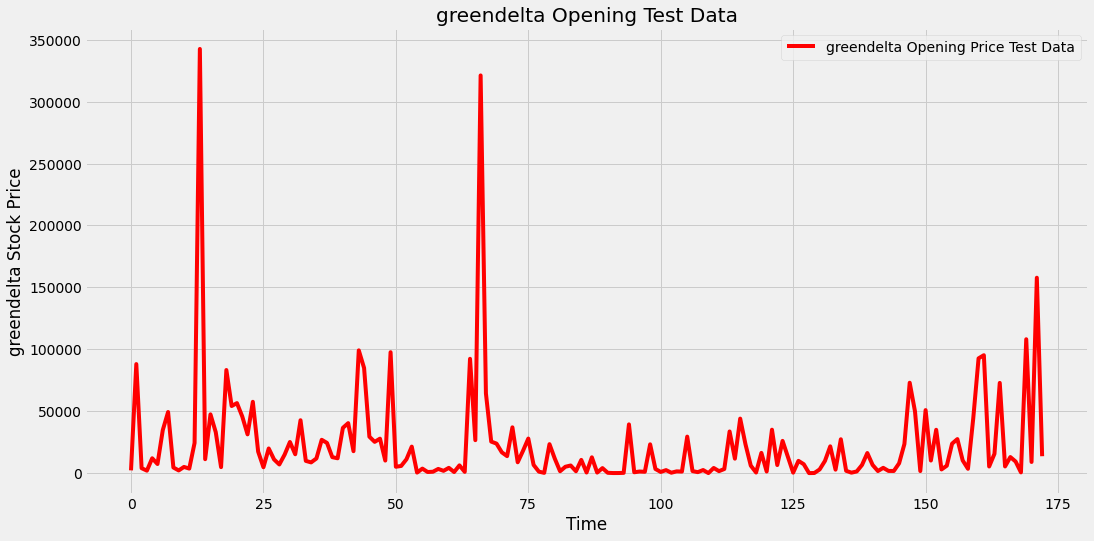

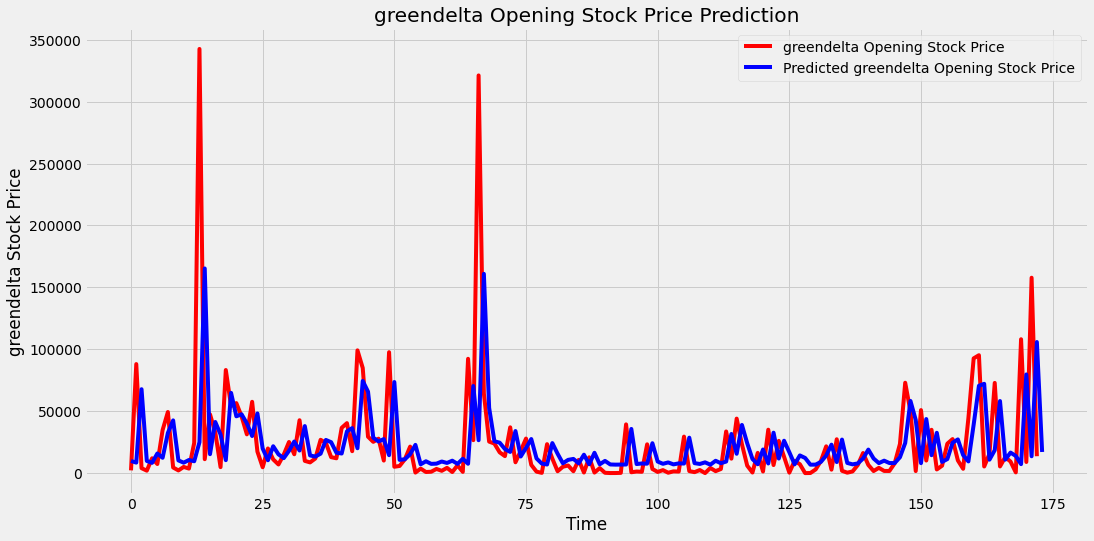

In [0]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price
#dataset_test = pd.read_csv('test_greendelta.csv')
real_stock_price_volume = dataset_test.iloc[:, 5:6].values
# Getting the predicted stock price 

dataset_total_volume = pd.concat((dataset_train['VOLUME'], dataset_test['VOLUME']), axis = 0)

inputs_volume = dataset_total_volume[len(dataset_total_volume) - len(dataset_test) - 1:].values
inputs_volume = inputs_volume.reshape(-1,1)
inputs_volume = sc.transform(inputs_volume)

X_test_volume = []
for i in range(1, 175):
    X_test_volume.append(inputs_volume[i-1:i, 0])
X_test_volume = np.array(X_test_volume)
X_test_volume = np.reshape(X_test_volume, (X_test_volume.shape[0], X_test_volume.shape[1], 1))

predicted_stock_price_volume = regressor_volume.predict(X_test_volume)
predicted_stock_price_volume = sc.inverse_transform(predicted_stock_price_volume)

# Visualising the results
plt.figure(figsize=(16,8))
plt.plot(real_stock_price_volume, color = 'red', label = 'greendelta Opening Price Test Data')
#plt.plot(predicted_stock_price_opening, color = 'blue', label = 'Predicted greendelta Opening Stock Price')
plt.title('greendelta Opening Test Data')
plt.xlabel('Time')
plt.ylabel('greendelta Stock Price')
plt.legend()
plt.show()

# Visualising the results
plt.figure(figsize=(16,8))
plt.plot(real_stock_price_volume, color = 'red', label = 'greendelta Opening Stock Price')
plt.plot(predicted_stock_price_volume, color = 'blue', label = 'Predicted greendelta Opening Stock Price')
plt.title('greendelta Opening Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('greendelta Stock Price')
plt.legend()
plt.show()